In [1]:
!pip install pyyaml h5py

In [18]:
# preparaing the dataset
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range = 25,
    zoom_range = 0.3,
    width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest"
)

In [56]:
# train data generator
train_generator = data_generator_train.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/dataset/set1/train',
    target_size=(image_size, image_size),
    batch_size=20,
    class_mode='categorical',
    shuffle=True,
    seed=42
)
        

Found 5000 images belonging to 10 classes.


In [57]:
# validation data
validation_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/dataset/set1/validation',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 1000 images belonging to 10 classes.


In [ ]:
# test data
test_generator = data_generator.flow_from_directory(
    "/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test",
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

In [65]:
test2_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/validation sets/validation3',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 200 images belonging to 10 classes.


In [58]:
# creating model for training
from keras.applications.resnet50 import ResNet50
resnet50_weights = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(224, 224, 3))

In [59]:
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, GlobalAveragePooling2D
# num_classes = 10
# new_model = Sequential()
# new_model.add(resnet50_model)
# new_model.add(Dense(num_classes, activation='softmax'))

# new_model.layers[0].trainable = False
# new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.optimizers import RMSprop, Adam, SGD
num_classes = 10
new_model = Sequential()
new_model.add(resnet50_model)
new_model.add(Dense(64, activation='relu', input_dim=(224,224,3)))
new_model.add(Dropout(0.3))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(num_classes, activation='softmax'))

# from keras.models import Sequential
# from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
# from keras.optimizers import RMSprop, SGD, Adam
# num_classes = 10
# new_model = Sequential()
# new_model.add(resnet50_model)
# new_model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
# new_model.add(Dense(num_classes, activation='softmax'))


new_model.layers[0].trainable = False
new_model.compile(optimizer=Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_12 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 23,723,658
Trainable params: 135,946
Non-trainable params: 23,587,712
____________________________________

In [60]:
# callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="max",
    baseline=0.97,
    restore_best_weights=False,
)

best_model_file = "/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/Fine tuning/resnet50_set1_(3).h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', mode='max',verbose=1, save_best_only=True)


In [61]:
# training the model
Step_size_train = train_generator.n // train_generator.batch_size
Step_size_valid = validation_generator.n // validation_generator.batch_size

history = new_model.fit(
    train_generator,
    steps_per_epoch=Step_size_train,
    validation_data=validation_generator,
    validation_steps=Step_size_valid,
    epochs=30,
    verbose=1,
    callbacks=[best_model]
)

Epoch 1/30
250/250 [==============================] - 102s 392ms/step - loss: 2.7028 - accuracy: 0.0869 - val_loss: 2.2922 - val_accuracy: 0.1650

Epoch 00001: val_accuracy improved from -inf to 0.16500, saving model to /content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/Fine tuning/resnet50_set1_(3).h5
Epoch 2/30
250/250 [==============================] - 98s 390ms/step - loss: 2.3807 - accuracy: 0.1327 - val_loss: 2.1595 - val_accuracy: 0.2480

Epoch 00002: val_accuracy improved from 0.16500 to 0.24800, saving model to /content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/Fine tuning/resnet50_set1_(3).h5
Epoch 3/30
250/250 [==============================] - 97s 388ms/step - loss: 2.2350 - accuracy: 0.1774 - val_loss: 2.0381 - val_accuracy: 0.3340

Epoch 00003: val_accuracy improved from 0.24800 to 0.33400, saving model to /content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/Fine tuning/resnet50_set1_(3).h5
Epoch 4/30
250/250 [============================

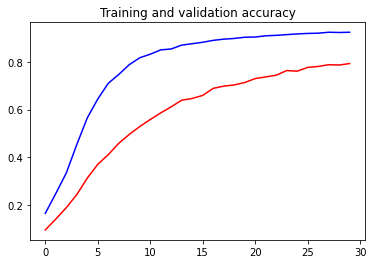

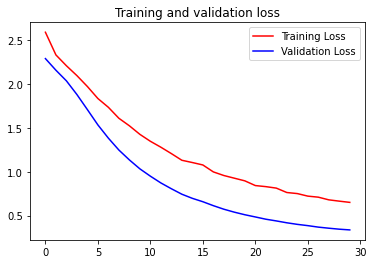

In [62]:
 # plotting the accuracy and loss curves woth epochs
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [66]:
# evaluate the model
Step_size_test2 = test2_generator.n // test2_generator.batch_size
result = new_model.evaluate(test2_generator, steps=Step_size_test2)
print(result)
print(new_model.metrics_names)

200/200 [==============================] - 3s 16ms/step - loss: 0.3142 - accuracy: 0.9100
[0.3141677677631378, 0.9100000262260437]
['loss', 'accuracy']


In [ ]:
# saving the model
new_model.save('/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/models/Img1000/ResNet50/resnet50_set2_val96_test89.h5')

In [ ]:
# making predictions with the model
classes = train_generator.class_indices
print(classes)
labels = {}
for k, v in classes.items():
    labels[v] = k

print(labels)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{0: 'butterfly', 1: 'cat', 2: 'chicken', 3: 'cow', 4: 'dog', 5: 'elephant', 6: 'horse', 7: 'sheep', 8: 'spider', 9: 'squirrel'}


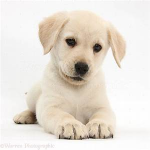

Predicted label dog 93.33540201187134
Predicted label cat 5.2260622382164
Predicted label sheep 0.36614094860851765




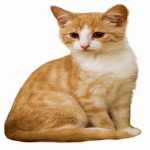

Predicted label cat 99.55654740333557
Predicted label dog 0.2515330910682678
Predicted label chicken 0.05230110255070031




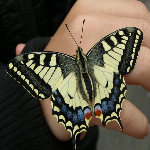

Predicted label butterfly 99.37170743942261
Predicted label cat 0.13172572944313288
Predicted label horse 0.11633116519078612




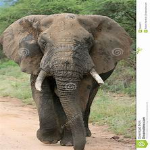

Predicted label elephant 97.50885963439941
Predicted label cow 0.7355235982686281
Predicted label horse 0.5949579179286957




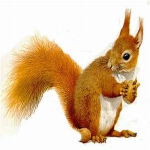

Predicted label squirrel 80.73148727416992
Predicted label cat 15.469326078891754
Predicted label chicken 2.222188003361225




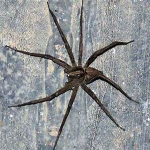

Predicted label spider 97.54422307014465
Predicted label butterfly 0.7088747806847095
Predicted label squirrel 0.6275959778577089




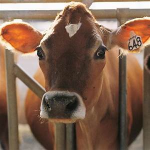

Predicted label cow 67.63815879821777
Predicted label horse 18.893860280513763
Predicted label sheep 6.2787264585494995




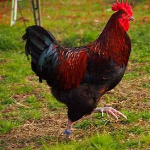

Predicted label chicken 99.61231350898743
Predicted label horse 0.17052971525117755
Predicted label cow 0.060986337484791875




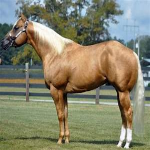

Predicted label horse 98.7545907497406
Predicted label cow 1.0727470740675926
Predicted label dog 0.08101756684482098




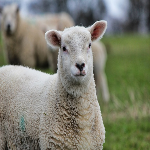

Predicted label sheep 99.38955903053284
Predicted label dog 0.15571691328659654
Predicted label squirrel 0.14334784355014563




In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from PIL import Image 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

dog = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/dog/OIP-1O9iuW5YCaoMBa97JR5FLwHaHd.jpeg'
cat = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/cat/174.jpeg'
butterfly = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/butterfly/ea34b0082bf7043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg'
elephant = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/elephant/OIP-6tNDAdLFXNpPifZ_dJq6SgHaKD.jpeg'
squirrel = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/squirrel/OIP-AnV2jM8066P8N8lx97lHUAHaFd.jpeg' 
spider = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/spider/OIP-1KTXbNyQHe62nVi7agRomwHaFj.jpeg'
cow = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/cow/OIP-B5ifRvhlqMat4PvRrwuO3gHaHa.jpeg'
chicken = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/chicken/490.jpeg'
horse = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/horse/OIP--5YhTv41EQikJq2qdaMQ0AHaF8.jpeg'
sheep = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test2/sheep/ea36b30820f1023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg'

imgs = [dog, cat, butterfly, elephant, squirrel, spider, cow, chicken, horse, sheep]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

for img_path in imgs:
    img = _load_image(img_path)
    
    imag = cv2.imread(img_path)
    imag = cv2.resize(imag, (150, 150))
    cv2_imshow(imag)

    pred = new_model.predict(img)
    pred = pred.flatten()
    for i in range(0, 3):
        prediction = np.argmax(pred)
        print(f'Predicted label {labels[prediction]} {pred[prediction] * 100}')
        pred[prediction] = -1

    print('\n')
    

In [53]:
test_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/dataset/set2/validation',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 200 images belonging to 10 classes.


In [39]:
from keras.models import load_model
mymodel = load_model('/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/Fine tuning/resnet50_set1.h5')

In [55]:
# evaluate the model
print("Evaluating the model")
Step_size_test = test_generator.n // test_generator.batch_size
result = mymodel.evaluate(test_generator, steps=Step_size_test)
print(result)
print(mymodel.metrics_names)
print(f"Accuracy for validation set4 {result[1]}")
print(f"Loss for validation set4 {result[0]}")

Evaluating the model
200/200 [==============================] - 4s 18ms/step - loss: 0.0934 - accuracy: 0.9650
[0.093393474817276, 0.9649999737739563]
['loss', 'accuracy']
Accuracy for validation set4 0.9649999737739563
Loss for validation set4 0.093393474817276


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
num_classes = 10
new_model = Sequential()
new_model.add(resnet50_model)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dropout(0.3))
new_model.add(Dense(num_classes, activation='softmax'))


new_model.layers[0].trainable = False
new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])